# Regression analysis - Total Reward

### Regression Analysis project for IBM Machine Learning Professional Certificate

Dataset : GlassDoor gender pay gap Dataset
Link: https://www.kaggle.com/nilimajauhari/glassdoor-analyze-gender-pay-gap?select=Glassdoor+Gender+Pay+Gap.csv

The dataset will be used to interpret total reward rather than to interpret gender pay gap

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose  import make_column_selector, make_column_transformer

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.metrics import r2_score, mean_squared_error

from sklearn import set_config


### Import data

In [3]:
raw_data = pd.read_csv("Glassdoor Gender Pay Gap.csv")

In [4]:
eda = raw_data

### Discover data

In [5]:
eda.shape

(1000, 9)

In [6]:
pd.set_option('display.max_column',35)

In [7]:
eda

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [8]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Check missing values

In [9]:
# Display sum of null value per column
eda.isna().sum()

# Display sum of null value per column, sorted 
eda.isna().sum().sort_values(ascending = False)

Bonus        0
BasePay      0
Seniority    0
Dept         0
Education    0
PerfEval     0
Age          0
Gender       0
JobTitle     0
dtype: int64

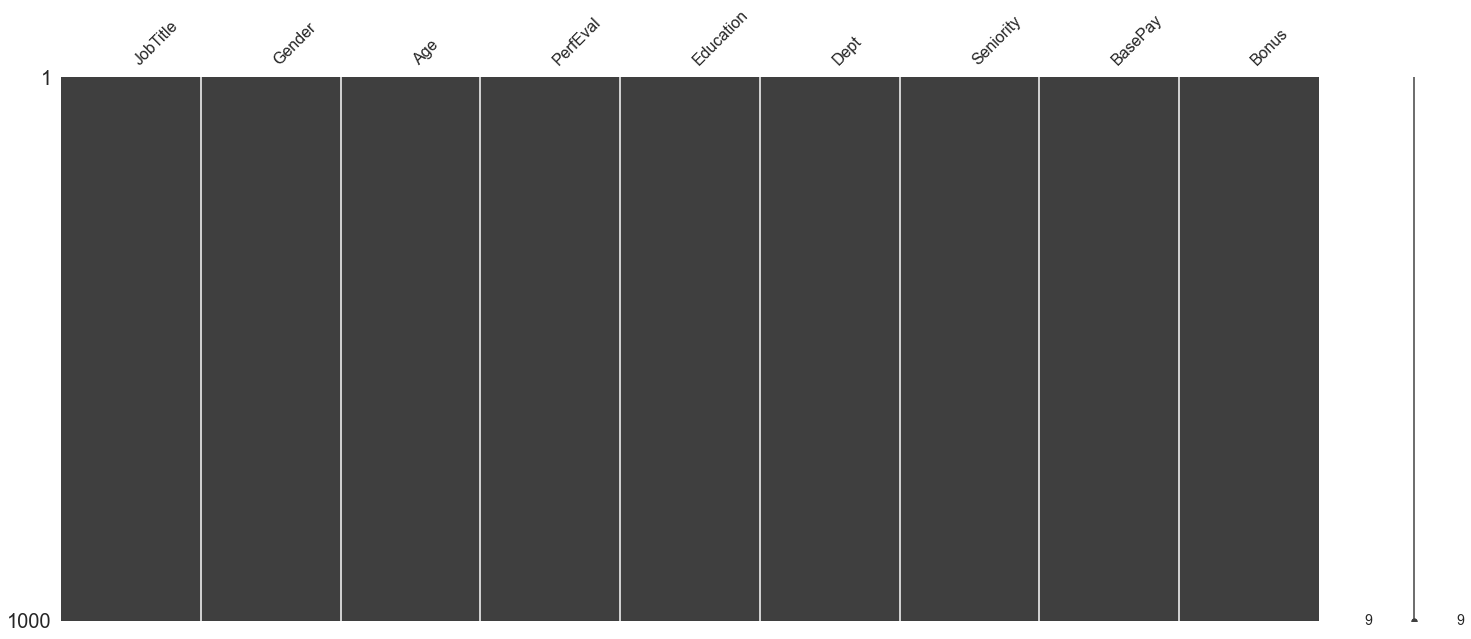

In [10]:
# Check missing values
ax = msno.matrix(eda.sample(1000))

### Features overview

In [11]:
# count number of feature by type
eda.dtypes.value_counts()

int64     5
object    4
dtype: int64

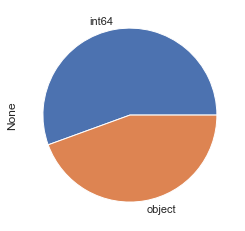

In [12]:
# Display number of feature by type in a pie chart
eda.dtypes.value_counts().plot.pie()

In [13]:
# List unique values for categorical columns
for col in eda.select_dtypes('object'):
    print(f'{col:-<30} {eda[col].unique()}')

JobTitle---------------------- ['Graphic Designer' 'Software Engineer' 'Warehouse Associate' 'IT'
 'Sales Associate' 'Driver' 'Financial Analyst' 'Marketing Associate'
 'Data Scientist' 'Manager']
Gender------------------------ ['Female' 'Male']
Education--------------------- ['College' 'PhD' 'Masters' 'High School']
Dept-------------------------- ['Operations' 'Management' 'Administration' 'Sales' 'Engineering']


In [14]:
for i in eda: print("No of Values for {} is {}".format(i,str(eda[i].nunique())))

No of Values for JobTitle is 10
No of Values for Gender is 2
No of Values for Age is 48
No of Values for PerfEval is 5
No of Values for Education is 4
No of Values for Dept is 5
No of Values for Seniority is 5
No of Values for BasePay is 992
No of Values for Bonus is 941


In [15]:
num_col=[]
for i in eda.columns:
    if(eda[i].dtypes!=object and eda[i].nunique()<30):
        print(i, eda[i].unique())
        num_col.append(i)

PerfEval [5 4 3 2 1]
Seniority [2 5 4 3 1]


### Drop unnecessary columns

In [16]:
# Drop uncessary columns for Data Exploration
# Drop columns ""
#eda.drop(eda.columns[[0,1,2]], inplace=True, axis=1)

In [17]:
eda.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


### Distribution of target variable

Text(0.5, 1.0, 'BasePay distribution')

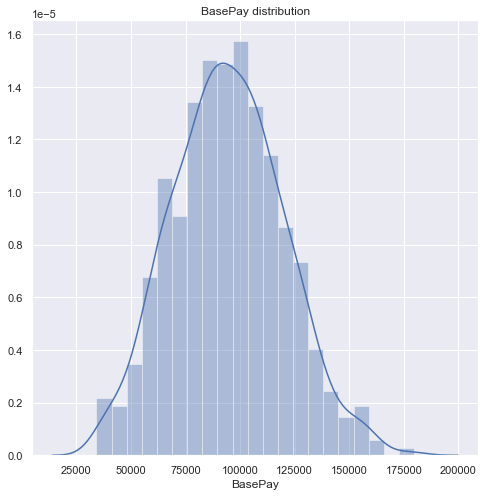

In [18]:
# Bar chart with Seaborn
plt.figure(figsize=(8, 8))
sns.distplot(eda['BasePay'])
plt.title('BasePay distribution')

Text(0.5, 1.0, 'Bonus distribution')

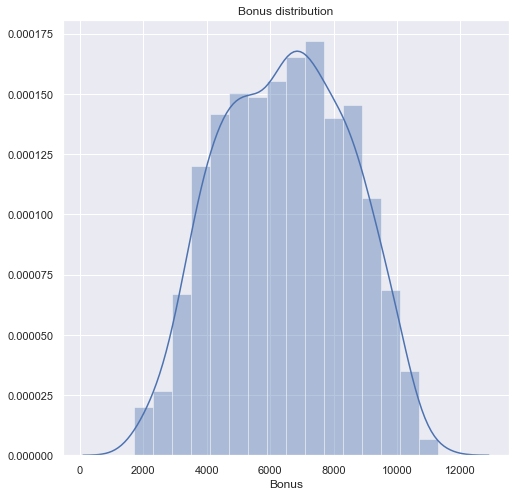

In [19]:
# Bar chart with Seaborn
plt.figure(figsize=(8, 8))
sns.distplot(eda['Bonus'])
plt.title('Bonus distribution')

In [20]:
# Saving the Seaborn Figure:
plt.savefig("Base Pay distribution.png", dpi=300)

<Figure size 432x288 with 0 Axes>

<Figure size 576x576 with 0 Axes>

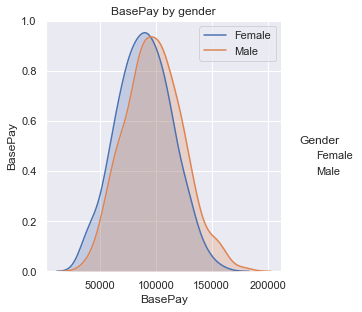

In [21]:
# Display relationships between variables
plt.figure(figsize=(8, 8))
mon_bp = eda[['BasePay','Gender']]
sns.pairplot(mon_bp, hue = 'Gender', height=4)
plt.title('BasePay by gender')
plt.legend()

In [22]:
print("Female BasePay mean is", eda[eda['Gender']=='Female'].BasePay.mean())
print("Male BasePay mean is  ", eda[eda['Gender']=='Male'].BasePay.mean())

Female BasePay mean is 89942.81837606838
Male BasePay mean is   98457.54511278195


In [23]:
#Male statistics
eda[eda['Gender']=='Male'].describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
Age,532.0,41.009398,14.715184,18.0,28.00,40.0,55.00,65.0
PerfEval,532.0,3.125940,1.410588,1.0,2.00,3.0,4.00,5.0
Seniority,532.0,2.934211,1.399958,1.0,2.00,3.0,4.00,5.0
BasePay,532.0,98457.545113,25517.520327,36642.0,81452.50,98223.0,115606.25,179726.0
Bonus,532.0,6461.133459,2001.756231,1703.0,4853.25,6480.5,7989.00,11293.0


In [24]:
#Female statistics
eda[eda['Gender']=='Female'].describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
Age,468.0,41.829060,13.804254,18.0,30.00,42.0,54.00,65.0
PerfEval,468.0,2.935897,1.433820,1.0,2.00,3.0,4.00,5.0
Seniority,468.0,3.012821,1.389717,1.0,2.00,3.0,4.00,5.0
BasePay,468.0,89942.818376,24378.277510,34208.0,73186.25,89913.5,106923.25,160614.0
Bonus,468.0,6474.012821,2009.473239,1884.0,4841.00,6553.0,8090.00,10768.0


<Figure size 576x576 with 0 Axes>

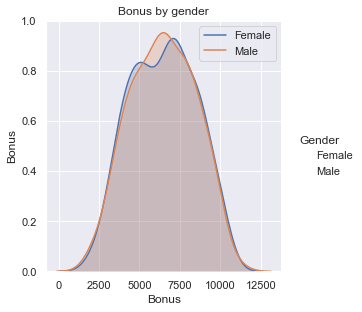

In [25]:
# Display relationships between variables
plt.figure(figsize=(8, 8))
mon_bo = eda[['Bonus','Gender']]
sns.pairplot(mon_bo, hue = 'Gender', height=4)
plt.title('Bonus by gender')
plt.legend()

In [26]:
print("Female Bonus mean is", eda[eda['Gender']=='Female'].Bonus.mean())
print("Male Bonus mean is  ", eda[eda['Gender']=='Male'].Bonus.mean())

Female Bonus mean is 6474.01282051282
Male Bonus mean is   6461.133458646616


<Figure size 1440x216 with 0 Axes>

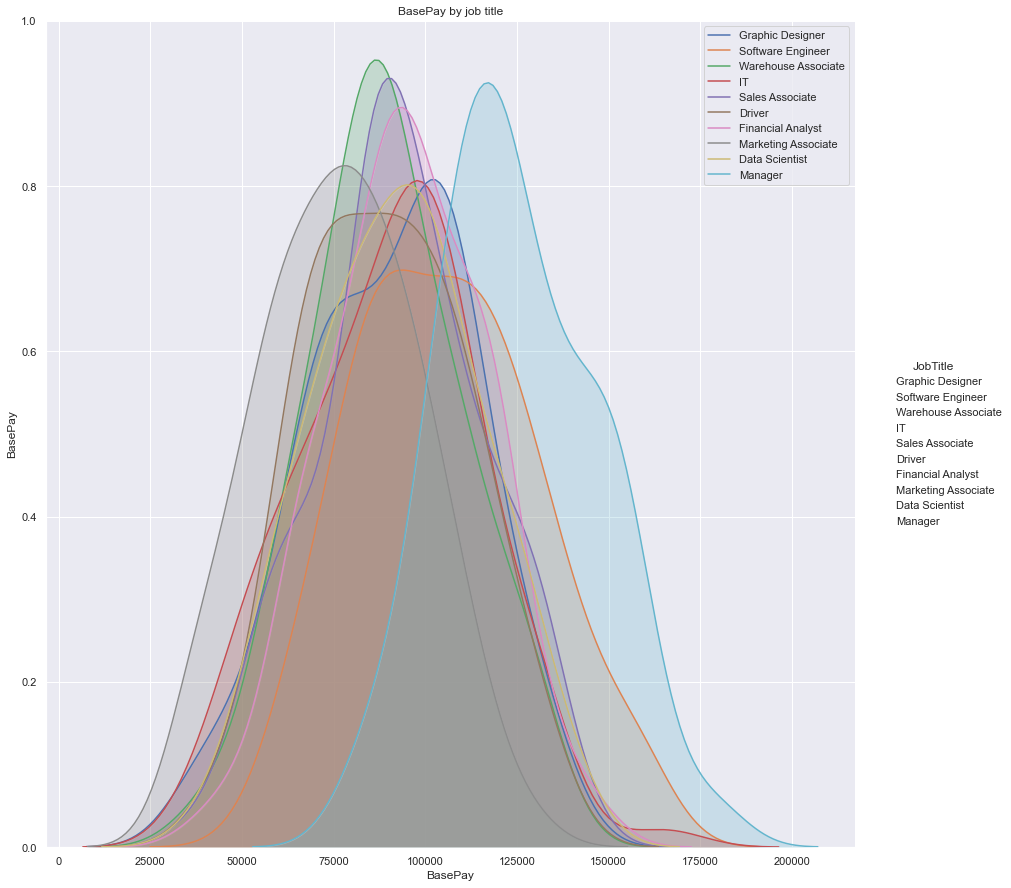

In [122]:
# Display relationships between variables
plt.figure(figsize=(20, 3))
mon_bp = eda[['BasePay','JobTitle']]
sns.pairplot(mon_bp, hue = 'JobTitle', height=12)
plt.title('BasePay by job title')
plt.legend()

In [124]:
print("Marketing base pay mean is", eda[eda['JobTitle']=='Marketing Associate'].BasePay.mean())
print("Manager base pay mean is  ", eda[eda['JobTitle']=='Manager'].BasePay.mean())

Marketing base pay mean is 76656.37288135593
Manager base pay mean is   125329.6


### Analysis of features

#### Statistics

In [27]:
# Descriptive statistics on numerical features
eda.describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,41.393,14.294856,18.0,29.00,41.0,54.25,65.0
PerfEval,1000.0,3.037,1.423959,1.0,2.00,3.0,4.00,5.0
Seniority,1000.0,2.971,1.395029,1.0,2.00,3.0,4.00,5.0
BasePay,1000.0,94472.653,25337.493272,34208.0,76850.25,93327.5,111558.00,179726.0
Bonus,1000.0,6467.161,2004.377365,1703.0,4849.50,6507.0,8026.00,11293.0


In [28]:
# Information on categorical features
eda.describe(include='object').T.head(4)

,count,unique,top,freq
JobTitle,1000,10,Marketing Associate,118
Gender,1000,2,Male,532
Education,1000,4,High School,265
Dept,1000,5,Operations,210


In [29]:
# Split numerical and categorical data 
num_data = eda.select_dtypes(include=[np.number])
cat_data = eda.select_dtypes(exclude=[np.number])

In [30]:
num_data.head()

,Age,PerfEval,Seniority,BasePay,Bonus
0,18,5,2,42363,9938
1,21,5,5,108476,11128
2,19,4,5,90208,9268
3,20,5,4,108080,10154
4,26,5,5,99464,9319


In [31]:
cat_data.head()

,JobTitle,Gender,Education,Dept
0,Graphic Designer,Female,College,Operations
1,Software Engineer,Male,College,Management
2,Warehouse Associate,Female,PhD,Administration
3,Software Engineer,Male,Masters,Sales
4,Graphic Designer,Male,Masters,Engineering


In [32]:
for col in eda.select_dtypes('float64', 'int64'):
    plt.figure()
    sns.distplot(eda[col])

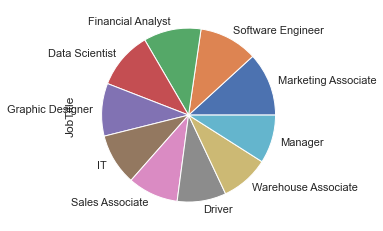

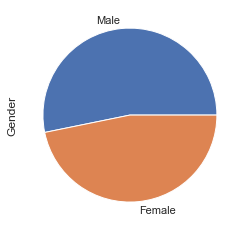

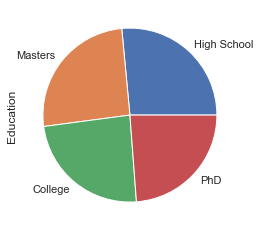

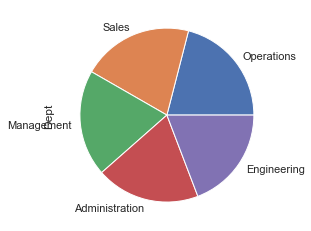

In [33]:
for col in eda.select_dtypes('object'):
    plt.figure()
    eda[col].value_counts().plot.pie()

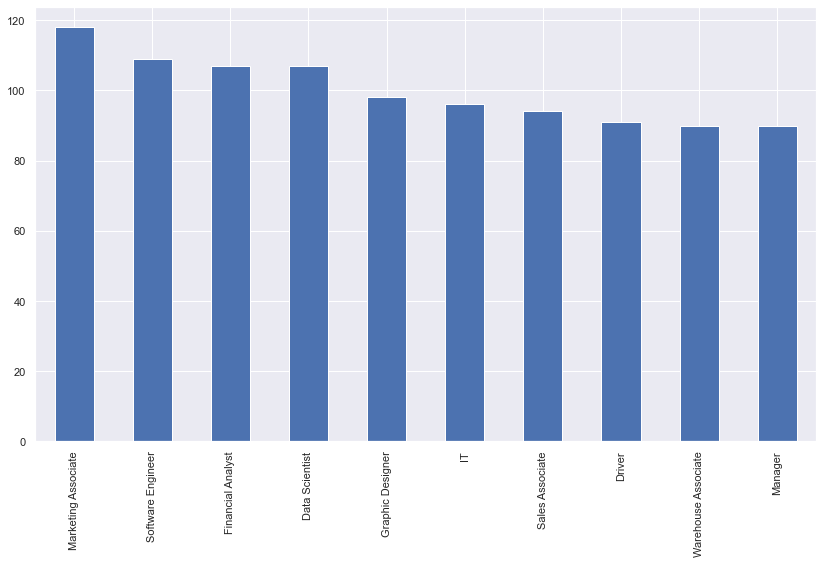

In [34]:
eda.JobTitle.value_counts().nlargest(30).plot(kind='bar', figsize=(14,8))

#### Relationship between features & target variable

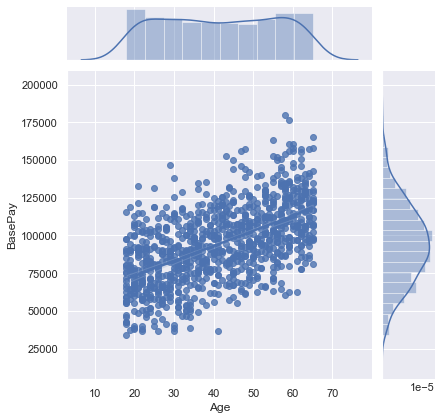

In [38]:
# Correlation between Age and Base pay
joint = sns.jointplot("Age", "BasePay", data=eda, kind='reg')

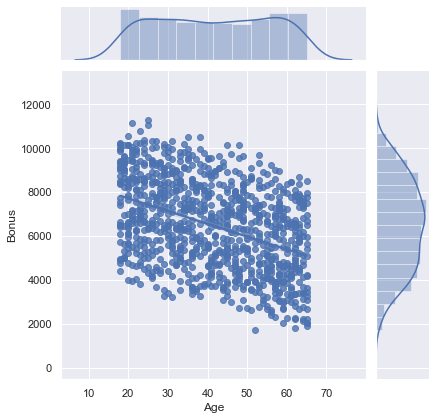

In [39]:
# Correlation between Age and Base pay
joint = sns.jointplot("Age", "Bonus", data=eda, kind='reg')

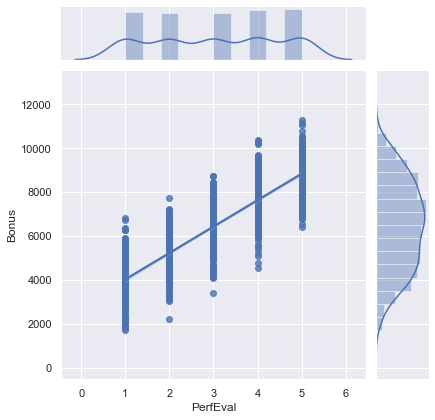

In [40]:
# Correlation between Age and Base pay
joint = sns.jointplot("PerfEval", "Bonus", data=eda, kind='reg')

<Figure size 576x288 with 0 Axes>

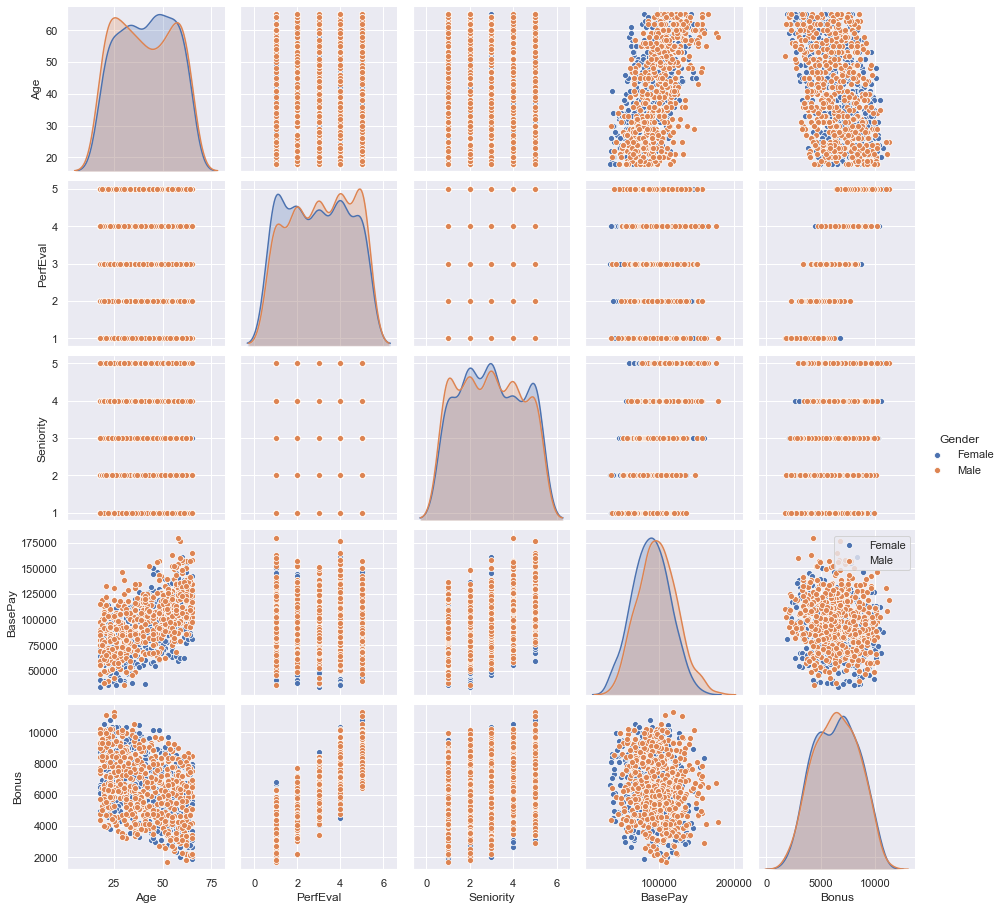

In [41]:
# Display relationships between variables
plt.figure(figsize=(8, 4))
sns.pairplot(eda, vars=num_data, hue="Gender")
plt.legend()

In [42]:
# Heatmap target variable vs each feature
#for col in eda:
#    plt.figure(figsize=(12, 4))
#    sns.heatmap(pd.crosstab(eda['Attrition'], eda[col]), annot=True, fmt='d')

#### Outliers analysis

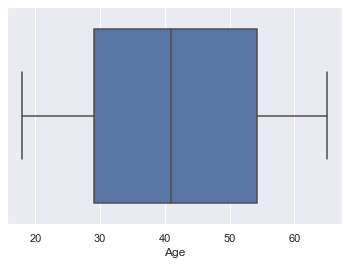

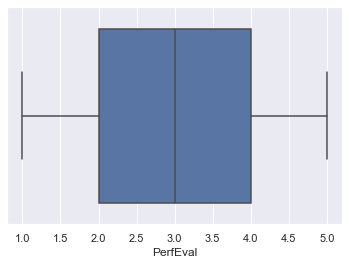

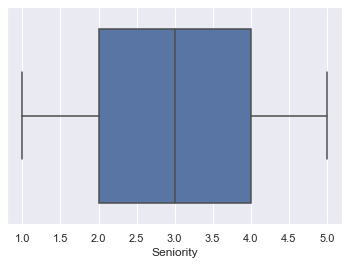

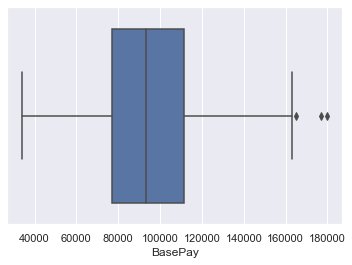

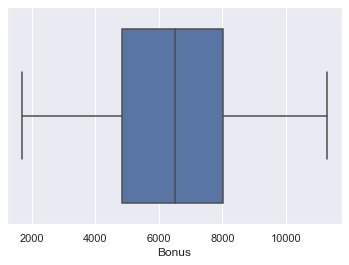

In [43]:
for col in eda.select_dtypes('int64'):
    plt.figure()
    sns.boxplot(eda[col])

#### Correlation analysis

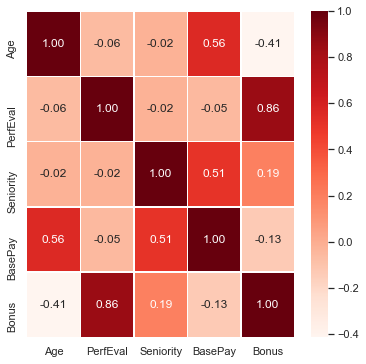

In [44]:
# Display correlation between numeric variables
plt.figure(figsize=(6, 6))
sns.heatmap(num_data.corr(), annot=True, linewidth=.5, fmt='.2f', cmap='Reds')

#### Feature engineering

In [45]:
# Highlight cells that hold the maximum value of a column. 
# with styler background_gradient which gives columns a gradient background color based on their values
num_data[["Age","PerfEval","Seniority"]].describe().T.drop("count", axis=1).style.background_gradient(
    subset=["mean", "50%"], cmap="Reds"
)

,mean,std,min,25%,50%,75%,max
Age,41.393000,14.294856,18.000000,29.000000,41.000000,54.250000,65.000000
PerfEval,3.037000,1.423959,1.000000,2.000000,3.000000,4.000000,5.000000
Seniority,2.971000,1.395029,1.000000,2.000000,3.000000,4.000000,5.000000


In [46]:
# Categorical data overview
cat_data.describe().T.head(9)

,count,unique,top,freq
JobTitle,1000,10,Marketing Associate,118
Gender,1000,2,Male,532
Education,1000,4,High School,265
Dept,1000,5,Operations,210


In [47]:
cat_data.head()

,JobTitle,Gender,Education,Dept
0,Graphic Designer,Female,College,Operations
1,Software Engineer,Male,College,Management
2,Warehouse Associate,Female,PhD,Administration
3,Software Engineer,Male,Masters,Sales
4,Graphic Designer,Male,Masters,Engineering


In [49]:
df = eda.copy()

#### Feature engineering

In [50]:
total_pay = df['BasePay'] + df['Bonus']
df['Total_pay'] = total_pay

In [51]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Total_pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [52]:
df.drop(['BasePay'], inplace=True, axis=1)
df.drop(['Bonus'], inplace=True, axis=1)

In [53]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,Total_pay
0,Graphic Designer,Female,18,5,College,Operations,2,52301
1,Software Engineer,Male,21,5,College,Management,5,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,108783


<Figure size 576x576 with 0 Axes>

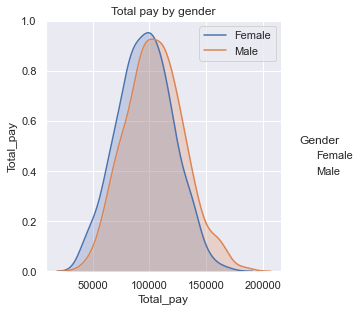

In [54]:
# Display relationships between variables
plt.figure(figsize=(8, 8))
mon_tc = df[['Total_pay','Gender']]
sns.pairplot(mon_tc, hue = 'Gender', height=4)
plt.title('Total pay by gender')
plt.legend()

#### Transform Education into an ordinal feature

In [55]:
def to_ordinal(df):
    
    code = {'High School':0,
            'College'    :1,
            'Masters'    :2,
            'PhD'        :3}
    
    df.loc[:,'Education'] = df['Education'].map(code)
        
    return df

In [56]:
df = to_ordinal(df)

In [57]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,Total_pay
0,Graphic Designer,Female,18,5,1,Operations,2,52301
1,Software Engineer,Male,21,5,1,Management,5,119604
2,Warehouse Associate,Female,19,4,3,Administration,5,99476
3,Software Engineer,Male,20,5,2,Sales,4,118234
4,Graphic Designer,Male,26,5,2,Engineering,5,108783


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   int64 
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   Total_pay  1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


#### Calculate categorical columns to be created with OneHotEncoder

In [59]:
# Select the object (string) columns
mask = df.dtypes == np.object
categorical_cols = df.columns[mask]

In [60]:
#Display mask
mask

JobTitle      True
Gender        True
Age          False
PerfEval     False
Education    False
Dept          True
Seniority    False
Total_pay    False
dtype: bool

In [61]:
#Display categorical features
categorical_cols

Index(['JobTitle', 'Gender', 'Dept'], dtype='object')

In [62]:
#Unique values for catgorical data
df[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)

JobTitle    10
Dept         5
Gender       2
dtype: int64

In [63]:
# Determine how many extra columns would be created
num_ohc_cols = (df[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

14

#### Train Test split

In [64]:
y_col = "Total_pay"

In [65]:
X = df.drop(y_col, axis=1)
y = df[y_col]

#### Preprocessor Pipeline

In [67]:
num_feat = make_column_selector(dtype_include=np.number)
cat_feat = make_column_selector(dtype_exclude=np.number)

In [68]:
mask_num = X.dtypes == np.int64
numerical_cols = X.columns[mask_num] 

In [69]:
ss = StandardScaler()
ohe = OneHotEncoder(drop='first')
pf = PolynomialFeatures(degree=3, include_bias=True)

In [70]:
num_pipe = make_pipeline(ss, pf)
cat_pipe = make_pipeline(ohe)

In [71]:
preprocessor = make_column_transformer((num_pipe, num_feat),(cat_pipe, cat_feat))

In [72]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=3))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000255513C4AC0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000255513AE970>)])

#### Evaluation function

Inspired from: 
https://alfurka.github.io/2018-11-18-grid-search/

Features importance with pipeline: https://katstam.com/regression-feature_importance/

In [73]:
#Function to test the ML algorithms performances
def eval_reg(models, X, y, iterations = 10):
    results = {}
    for i in models:
        r2_test    = []
        r2_train   = []
        rmse_test  = []
        rmse_train = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(X, 
                                                                y, 
                                                                test_size= 0.3,
                                                                random_state=13)
            r2_train.append(r2_score(y_train, 
                                    models[i].fit(X_train, y_train).predict(X_train)))
            r2_test.append(r2_score(y_test,
                                    models[i].fit(X_train, y_train).predict(X_test)))
            rmse_train.append(mean_squared_error(y_train, 
                                    models[i].fit(X_train, y_train).predict(X_train)))
            rmse_test.append(mean_squared_error(y_test,
                                    models[i].fit(X_train, y_train).predict(X_test)))

        results[i] = [np.mean(r2_train), np.mean(r2_test), np.mean(rmse_train), np.mean(rmse_test)]   
      
    return pd.DataFrame(results)


#### 1st set of models evaluation

In [74]:
models1 = {'Linear': Pipeline([("Preprocessor", preprocessor),
                             ("Linear", LinearRegression())]),
          'Lasso':   Pipeline([("Preprocessor", preprocessor),
                             ("Lasso", Lasso())]),
          'Ridge':   Pipeline([("Preprocessor", preprocessor),
                             ("Ridge", Ridge())]),
          'Elastic': Pipeline([("Preprocessor", preprocessor),
                             ("Elastic", ElasticNet())])
                            }

In [75]:
eval_reg(models1, X, y)

,Linear,Lasso,Ridge,Elastic
0,8.509791e-01,8.509786e-01,8.508740e-01,6.587353e-01
1,8.239209e-01,8.239571e-01,8.246091e-01,6.470548e-01
2,9.193893e+07,9.193924e+07,9.200380e+07,2.105444e+08
3,1.168429e+08,1.168189e+08,1.163862e+08,2.342081e+08


In [76]:
poly_columns = list(models1['Linear']
                      .named_steps['Preprocessor']
                      .named_transformers_['pipeline-1']
                      .named_steps['polynomialfeatures']
                      .get_feature_names(input_features=numerical_cols)
                     )

In [77]:
onehot_columns = list(models1['Linear']
                      .named_steps['Preprocessor']
                      .named_transformers_['pipeline-2']
                      .named_steps['onehotencoder']
                      .get_feature_names(input_features=categorical_cols)
                     )

In [78]:
features_list = list(poly_columns)
features_list.extend(onehot_columns)

In [79]:
coefs = pd.DataFrame(features_list)

In [80]:
# let's look at the absolute value of coefficients for each model
coefficients = pd.DataFrame()
coefficients['Linear regression']  = models1['Linear'].named_steps['Linear'].coef_.ravel()
coefficients['Lasso regression']   = models1['Lasso'].named_steps['Lasso'].coef_.ravel()
coefficients['Ridge regression']   = models1['Ridge'].named_steps['Ridge'].coef_.ravel()
coefficients['Elastic regression'] = models1['Elastic'].named_steps['Elastic'].coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe() 

,Linear regression,Lasso regression,Ridge regression,Elastic regression
count,4.900000e+01,49.000000,49.000000,49.000000
mean,2.754059e+03,2747.821287,2712.050680,930.671079
std,5.969690e+03,5965.417763,5825.349904,1038.804397
min,5.864027e-13,0.000000,0.000000,0.000000
25%,2.840283e+02,283.904336,246.876448,201.620276
50%,5.282540e+02,528.027497,537.000279,484.003094
75%,1.954751e+03,1942.444433,1845.340253,1197.664396
max,3.297747e+04,32955.792357,32032.410017,4349.782704


In [81]:
#Number of coefficients greater than 0
#Lasso usuallu zeroed a few coefficients
(coefficients>0).sum()

Linear regression     49
Lasso regression      48
Ridge regression      48
Elastic regression    48
dtype: int64

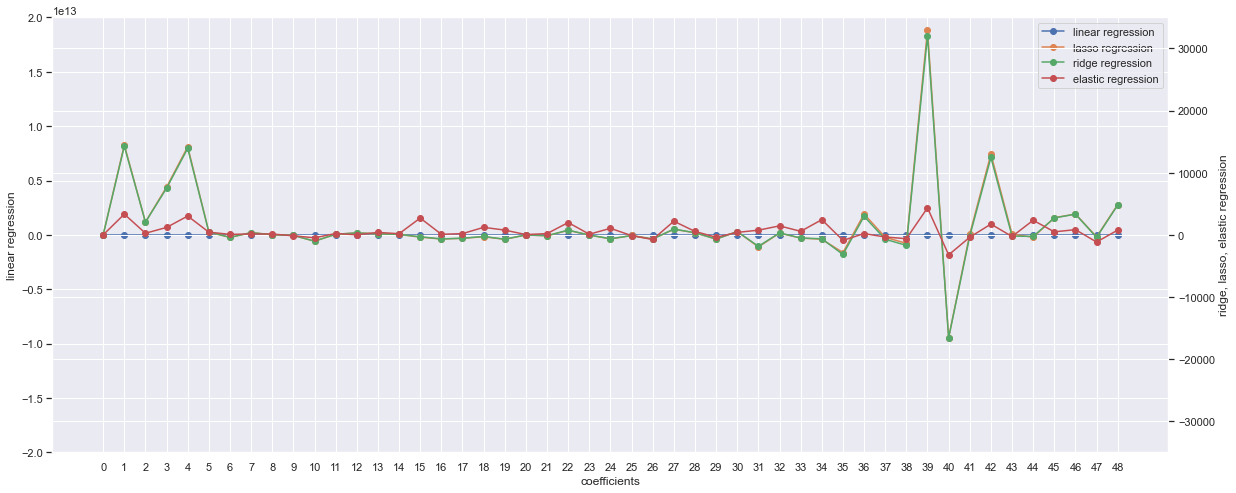

In [82]:
colors = sns.color_palette()

plt.figure(figsize=(20,8))

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(models1['Linear'].named_steps['Linear'].coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(models1['Lasso'].named_steps['Lasso'].coef_.ravel(), 
         color=colors[1], marker='o', label='lasso regression')

ax2.plot(models1['Ridge'].named_steps['Ridge'].coef_.ravel(), 
         color=colors[2], marker='o', label='ridge regression')

ax2.plot(models1['Elastic'].named_steps['Elastic'].coef_.ravel(), 
         color=colors[3], marker='o', label='elastic regression')

# Customize axes scales
ax1.set_ylim(-2e13, 2e13)
ax2.set_ylim(-35000, 35000)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge, lasso, elastic regression')

ax1.set_xticks(range(len(models1['Linear'].named_steps['Linear'].coef_)));

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

In [83]:
pd.DataFrame(models1['Linear'].named_steps['Linear'].coef_)

,0
0,-5.864027e-13
1,1.449951e+04
2,2.074817e+03
3,7.730715e+03
4,1.419824e+04
5,4.503735e+02
6,-4.140690e+02
7,3.627543e+02
8,2.045735e+01
9,-9.339499e+01


In [102]:
#Regression coefficients
coefs1l = pd.DataFrame(models1['Linear'].named_steps['Linear'].coef_, index=features_list, columns=['Feature importance']).sort_values('Feature importance',ascending=False)
coefs1l

,Feature importance
JobTitle_Manager,3.297747e+04
Age,1.449951e+04
Seniority,1.419824e+04
JobTitle_Software Engineer,1.303264e+04
Education,7.730715e+03
Dept_Sales,4.895087e+03
Dept_Management,3.373017e+03
JobTitle_Financial Analyst,3.364482e+03
Dept_Engineering,2.764126e+03
PerfEval,2.074817e+03


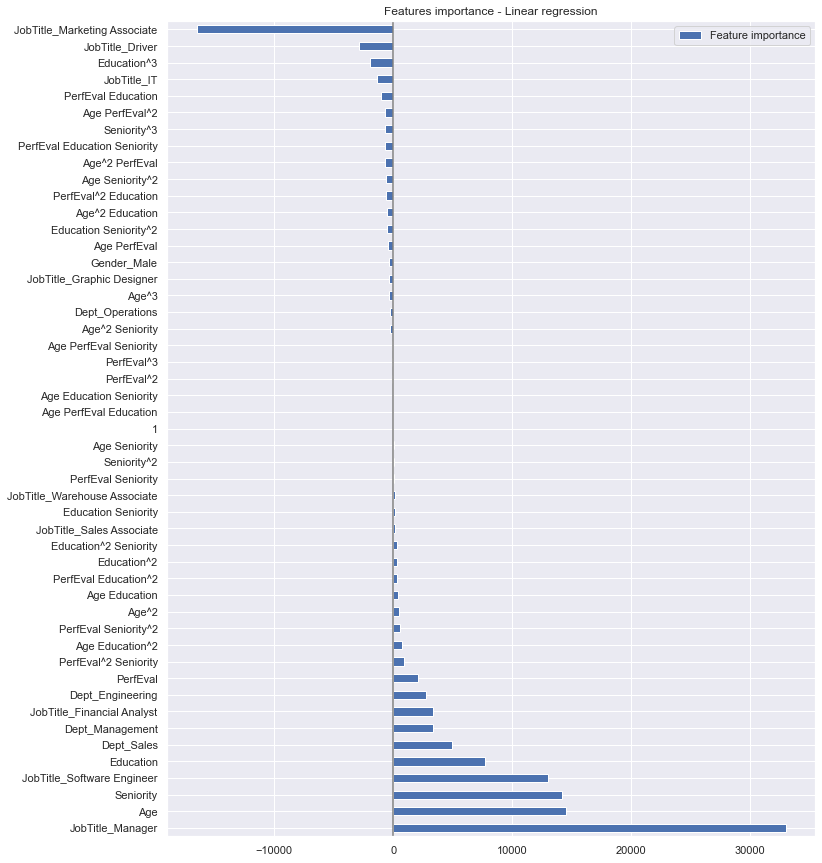

In [103]:
coefs1l.plot(kind="barh", figsize=(15, 15))
plt.title("Features importance - Linear regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [104]:
#Regression coefficients
coefs1la = pd.DataFrame(models1['Lasso'].named_steps['Lasso'].coef_, index=features_list, columns=['Feature importance']).sort_values('Feature importance',ascending=False)
coefs1la

,Feature importance
JobTitle_Manager,32955.792357
Age,14483.663672
Seniority,14182.575628
JobTitle_Software Engineer,13013.525484
Education,7701.292123
Dept_Sales,4880.342583
Dept_Management,3357.864016
JobTitle_Financial Analyst,3348.184494
Dept_Engineering,2750.183275
PerfEval,2056.667600


In [106]:
#Regression coefficients
coefs1ri = pd.DataFrame(models1['Ridge'].named_steps['Ridge'].coef_, index=features_list, columns=['Feature importance']).sort_values('Feature importance',ascending=False)
coefs1ri

,Feature importance
JobTitle_Manager,32032.410017
Age,14274.727496
Seniority,13924.017786
JobTitle_Software Engineer,12456.476000
Education,7513.627699
Dept_Sales,4797.625156
Dept_Management,3330.137708
JobTitle_Financial Analyst,2985.374236
Dept_Engineering,2725.265767
PerfEval,2051.096056


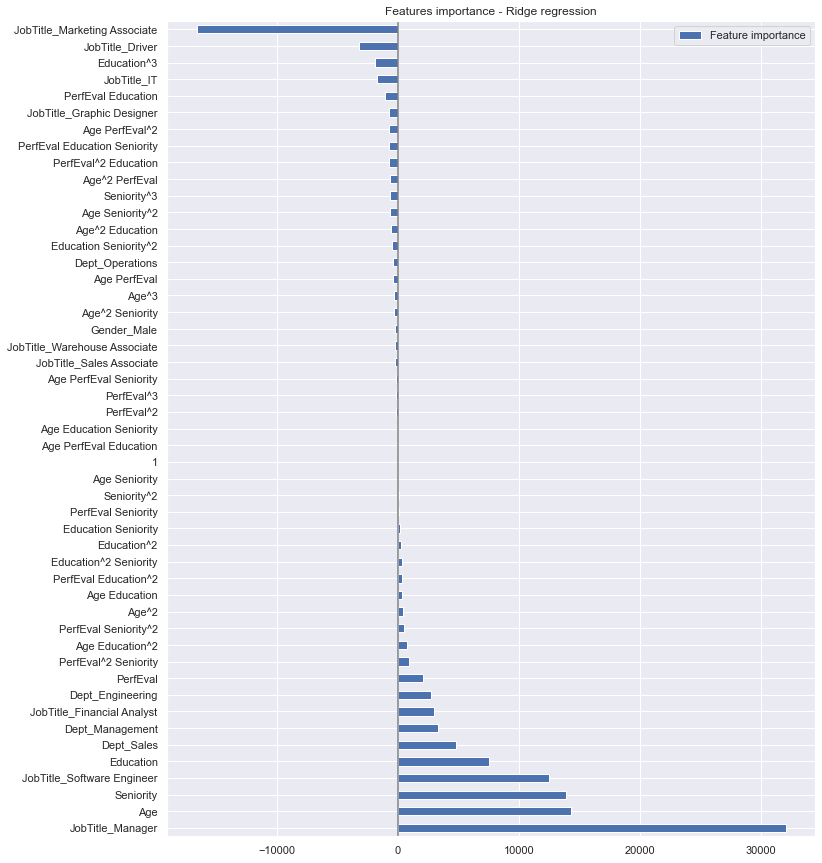

In [107]:
coefs1ri.plot(kind="barh", figsize=(15, 15))
plt.title("Features importance - Ridge regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [108]:
#Regression coefficients
coefs1en = pd.DataFrame(models1['Elastic'].named_steps['Elastic'].coef_, index=features_list, columns=['Feature importance']).sort_values('Feature importance',ascending=False)
coefs1en

,Feature importance
JobTitle_Manager,4349.782704
Age,3337.012554
Seniority,3028.703305
Age^3,2708.091387
Seniority^3,2444.654290
Gender_Male,2346.589215
PerfEval^2 Seniority,2195.336695
Age Education^2,1984.514636
JobTitle_Software Engineer,1731.682536
Education^2 Seniority,1445.539594


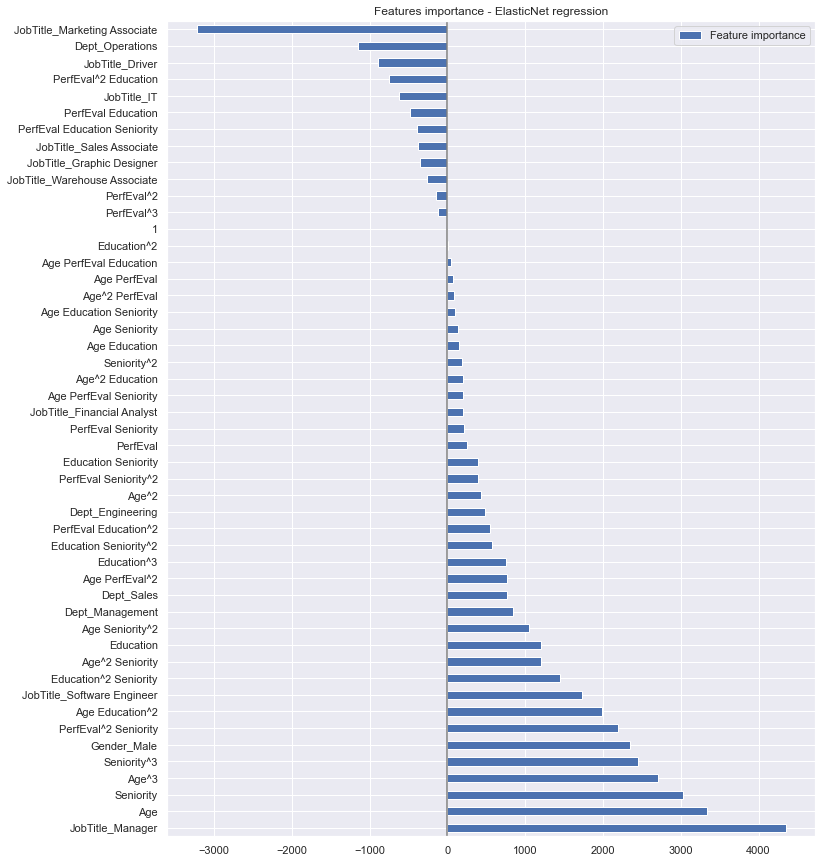

In [109]:
coefs1en.plot(kind="barh", figsize=(15, 15))
plt.title("Features importance - ElasticNet regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

#### 2nd set of models evaluation

In [86]:
lasso_params = {'Lasso__alpha':[1e-5, 5e-5, 0.0001, 0.0005]}
ridge_params = {'Ridge__alpha':[1e-5, 5e-5, 0.0001, 0.0005]}
elast_params = {'Elastic__alpha':[1e-5, 5e-5, 0.0001, 0.0005], 
                'Elastic__l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

models2 = {'Linear':   Pipeline([("Preprocessor", preprocessor),
                                 ("Linear", LinearRegression())]),
           'Lasso': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                           ("Lasso", Lasso())]),
                                 param_grid = lasso_params, 
                                 cv=5)
                                 .fit(X,y).best_estimator_,
           'Ridge': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                           ("Ridge", Ridge())]),
                                 param_grid = ridge_params,
                                 cv=5)
                                 .fit(X,y).best_estimator_,
           'Elastic': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                           ("Elastic", ElasticNet())]),
                                 param_grid = elast_params,
                                 cv=5)
                                 .fit(X,y).best_estimator_
          }

In [87]:
eval_reg(models2, X, y)

,Linear,Lasso,Ridge,Elastic
0,8.509791e-01,8.509791e-01,8.509791e-01,8.509680e-01
1,8.239209e-01,8.239209e-01,8.239213e-01,8.241691e-01
2,9.193893e+07,9.193893e+07,9.193893e+07,9.194579e+07
3,1.168429e+08,1.168429e+08,1.168426e+08,1.166782e+08


In [88]:
# let's look at the absolute value of coefficients for each model
coefficients = pd.DataFrame()
coefficients['Linear regression'] = models2['Linear'].named_steps['Linear'].coef_.ravel()
coefficients['Lasso regression']  = models2['Lasso'].named_steps['Lasso'].coef_.ravel()
coefficients['Ridge regression']  = models2['Ridge'].named_steps['Ridge'].coef_.ravel()
coefficients['Elastic regression'] = models2['Elastic'].named_steps['Elastic'].coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe() 

,Linear regression,Lasso regression,Ridge regression,Elastic regression
count,4.900000e+01,49.000000,49.000000,49.000000
mean,2.754059e+03,2754.056349,2754.029423,2735.341947
std,5.969690e+03,5969.687979,5969.617119,5924.710475
min,5.864027e-13,0.000000,0.000000,0.000000
25%,2.840283e+02,284.028221,284.046609,294.686576
50%,5.282540e+02,528.252012,528.242608,528.874300
75%,1.954751e+03,1954.744734,1954.693625,1919.209126
max,3.297747e+04,32977.458020,32976.961309,32665.243125


In [89]:
#Number of coefficients greater than 0
#Lasso usuallu zeroed a few coefficients
(coefficients>0).sum()

Linear regression     49
Lasso regression      48
Ridge regression      48
Elastic regression    48
dtype: int64

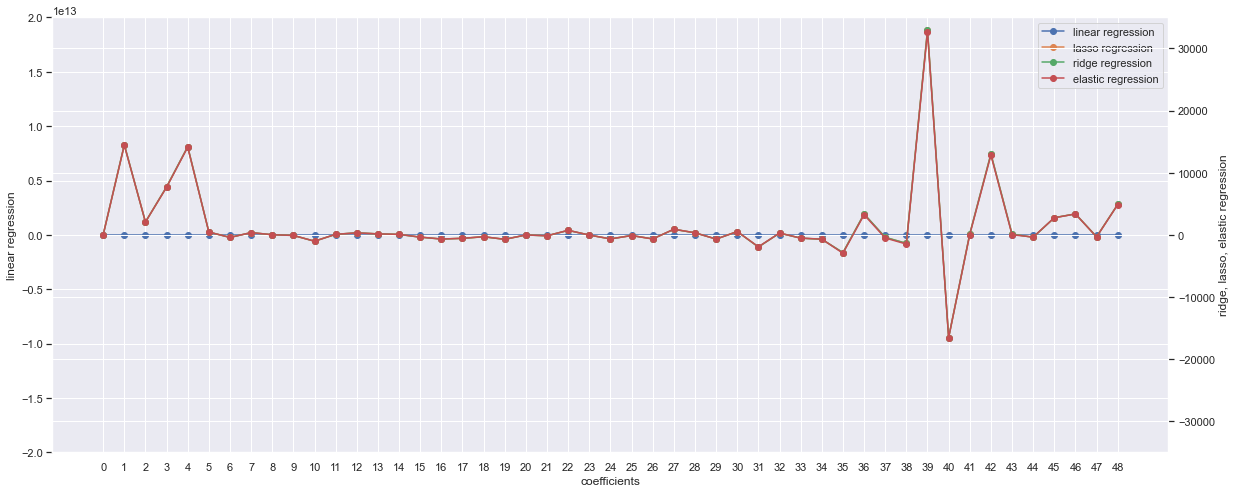

In [90]:
colors = sns.color_palette()

plt.figure(figsize=(20,8))

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(models2['Linear'].named_steps['Linear'].coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(models2['Lasso'].named_steps['Lasso'].coef_.ravel(), 
         color=colors[1], marker='o', label='lasso regression')

ax2.plot(models2['Ridge'].named_steps['Ridge'].coef_.ravel(), 
         color=colors[2], marker='o', label='ridge regression')

ax2.plot(models2['Elastic'].named_steps['Elastic'].coef_.ravel(), 
         color=colors[3], marker='o', label='elastic regression')

# Customize axes scales
ax1.set_ylim(-2e13, 2e13)
ax2.set_ylim(-35000, 35000)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge, lasso, elastic regression')

ax1.set_xticks(range(len(models1['Linear'].named_steps['Linear'].coef_)));

In [91]:
set_config(display='diagram')
models2

{'Linear': Pipeline(steps=[('Preprocessor',
                  ColumnTransformer(transformers=[('pipeline-1',
                                                   Pipeline(steps=[('standardscaler',
                                                                    StandardScaler()),
                                                                   ('polynomialfeatures',
                                                                    PolynomialFeatures(degree=3))]),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x00000255513C4AC0>),
                                                  ('pipeline-2',
                                                   Pipeline(steps=[('onehotencoder',
                                                                    OneHotEncoder(drop='first'))]),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x00000255513AE97

In [110]:
pd.DataFrame(models2['Linear'].named_steps['Linear'].coef_)

,0
0,-5.864027e-13
1,1.449951e+04
2,2.074817e+03
3,7.730715e+03
4,1.419824e+04
5,4.503735e+02
6,-4.140690e+02
7,3.627543e+02
8,2.045735e+01
9,-9.339499e+01


In [111]:
#Regression coefficients
coefs2l = pd.DataFrame(models2['Linear'].named_steps['Linear'].coef_, index=features_list, columns=['Feature importance']).sort_values('Feature importance',ascending=False)
coefs2l

,Feature importance
JobTitle_Manager,3.297747e+04
Age,1.449951e+04
Seniority,1.419824e+04
JobTitle_Software Engineer,1.303264e+04
Education,7.730715e+03
Dept_Sales,4.895087e+03
Dept_Management,3.373017e+03
JobTitle_Financial Analyst,3.364482e+03
Dept_Engineering,2.764126e+03
PerfEval,2.074817e+03


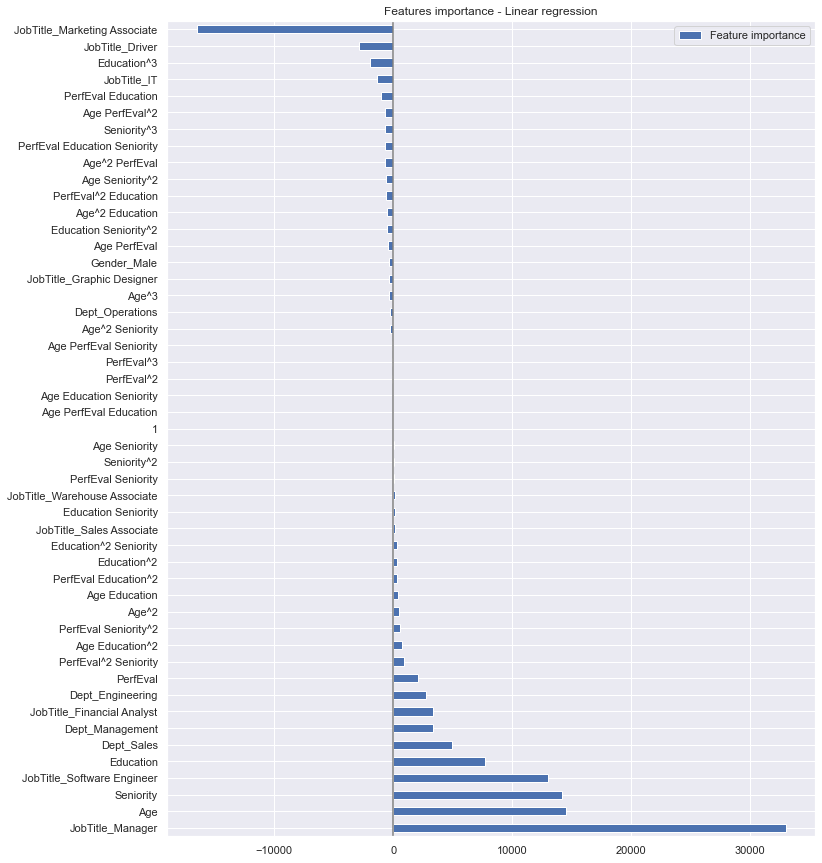

In [112]:
coefs2l.plot(kind="barh", figsize=(15, 15))
plt.title("Features importance - Linear regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [113]:
#Regression coefficients
coefs2la = pd.DataFrame(models2['Lasso'].named_steps['Lasso'].coef_, index=features_list, columns=['Feature importance']).sort_values('Feature importance',ascending=False)
coefs2la

,Feature importance
JobTitle_Manager,32977.458020
Age,14499.503144
Seniority,14198.230256
JobTitle_Software Engineer,13032.633951
Education,7730.700029
Dept_Sales,4895.080064
Dept_Management,3373.009012
JobTitle_Financial Analyst,3364.473520
Dept_Engineering,2764.119262
PerfEval,2074.807977


In [114]:
#Regression coefficients
coefs2ri = pd.DataFrame(models2['Ridge'].named_steps['Ridge'].coef_, index=features_list, columns=['Feature importance']).sort_values('Feature importance',ascending=False)
coefs2ri

,Feature importance
JobTitle_Manager,32976.961309
Age,14499.397001
Seniority,14198.099160
JobTitle_Software Engineer,13032.324409
Education,7730.600797
Dept_Sales,4895.038378
Dept_Management,3372.995989
JobTitle_Financial Analyst,3364.263219
Dept_Engineering,2764.109141
PerfEval,2074.806664


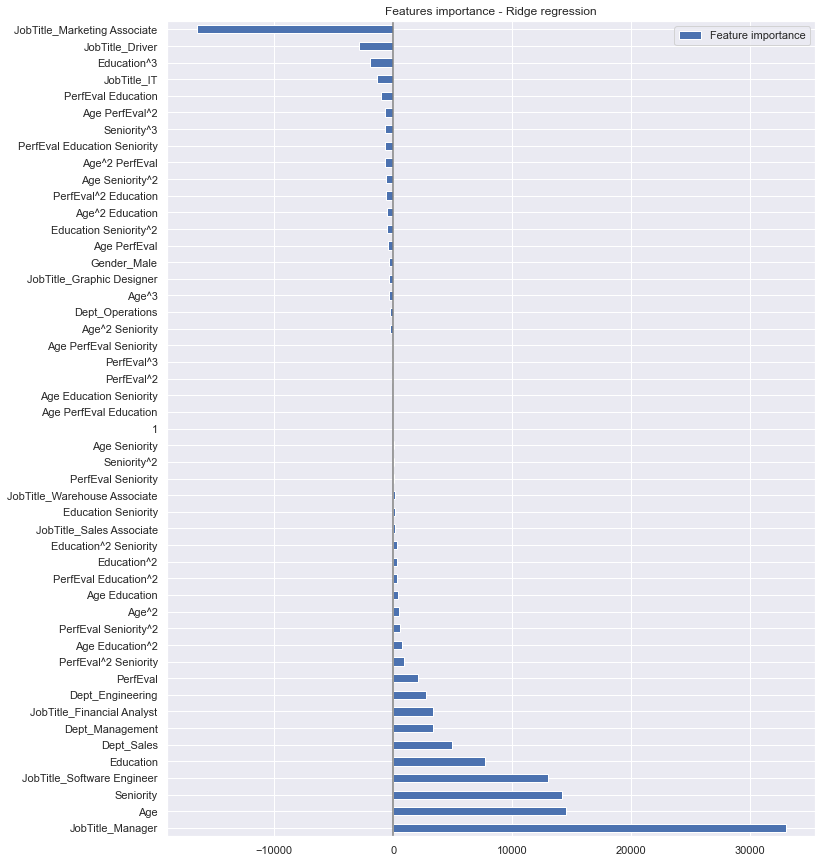

In [115]:
coefs2ri.plot(kind="barh", figsize=(15, 15))
plt.title("Features importance - Ridge regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [116]:
#Regression coefficients
coefs2en = pd.DataFrame(models2['Elastic'].named_steps['Elastic'].coef_, index=features_list, columns=['Feature importance']).sort_values('Feature importance',ascending=False)
coefs2en

,Feature importance
JobTitle_Manager,32665.243125
Age,14427.979783
Seniority,14111.044452
JobTitle_Software Engineer,12838.326604
Education,7660.062037
Dept_Sales,4864.223039
Dept_Management,3359.836149
JobTitle_Financial Analyst,3233.149912
Dept_Engineering,2752.823705
PerfEval,2067.945312


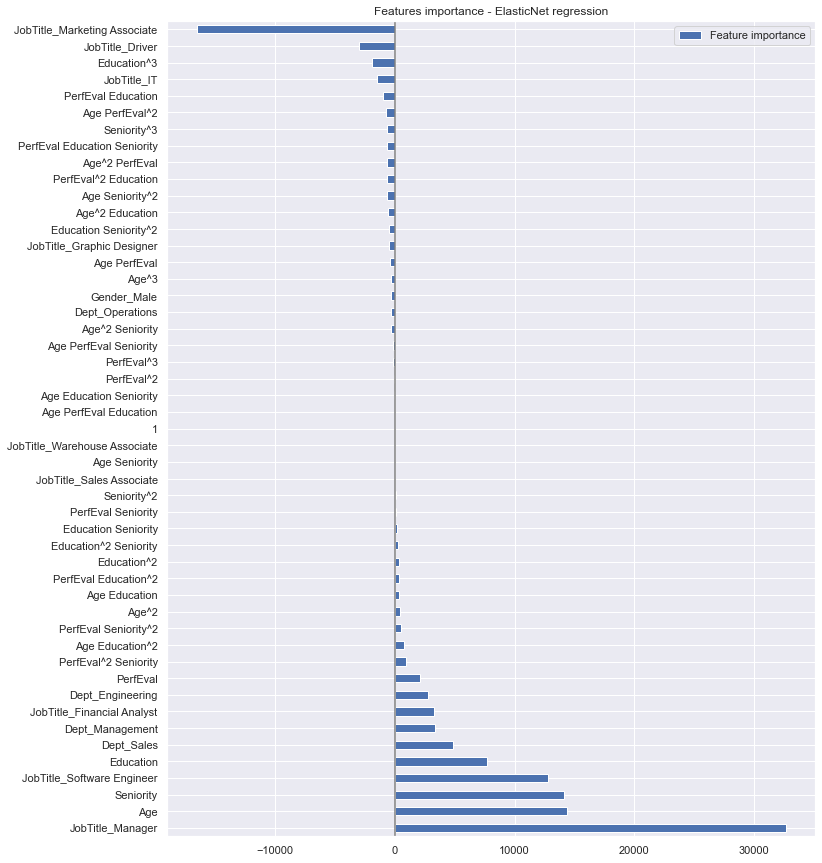

In [117]:
coefs2en.plot(kind="barh", figsize=(15, 15))
plt.title("Features importance - ElasticNet regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)